Ridha Zalfa Salsabila - 1301194100 - IF-42-GAB03

# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print('matplotlib version : ', mpl.__version__)

matplotlib version :  3.2.2


Download the dataset and read it into a *pandas* dataframe.

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [4]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [5]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

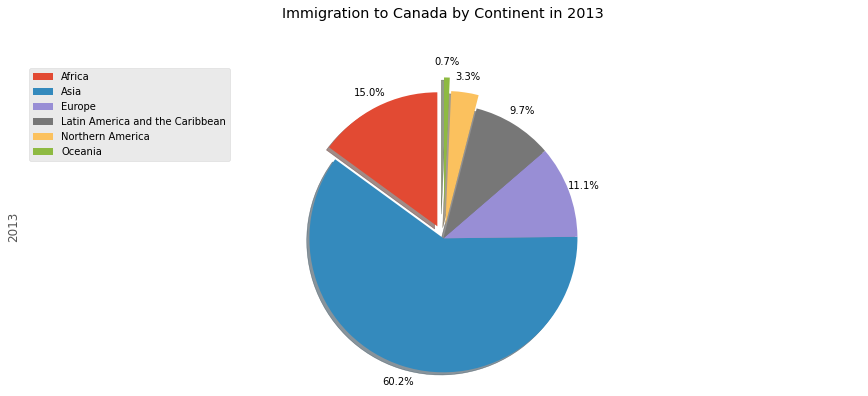

In [6]:
### type your answer here
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] 
df_continents['2013'].plot(kind='pie',
                          figsize=(15, 6),
                          autopct='%1.1f%%', 
                          startangle=90,    
                          shadow=True,       
                          labels=None,                 
                          pctdistance=1.12,            
                          explode=explode_list
                          )

plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [7]:
### type your answer here
df_PA = df_can.loc[['Pakistan', 'Afghanistan'], years].transpose()

df_PA.head()


Country,Pakistan,Afghanistan
1980,978,16
1981,972,39
1982,1201,39
1983,900,47
1984,668,71


Step 2: Plot data.

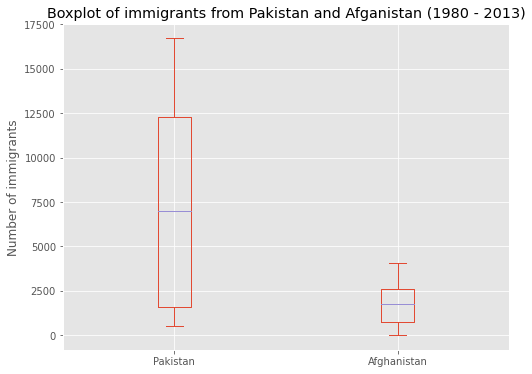

In [8]:
### type your answer here
df_PA.plot(kind='box', figsize=(8, 6))

plt.title('Boxplot of immigrants from Pakistan and Afganistan (1980 - 2013)')
plt.ylabel('Number of immigrants')
plt.show()

**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [9]:
### type your answer here
#1. create dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
#2. sum 
df_total = pd.DataFrame(df_countries.sum(axis=1))
#3. reset index
df_total.reset_index(inplace=True)
#4. rename
df_total.columns = ['year', 'total']
#5. change column from strinf to int
df_total['year'] = df_total['year'].astype(int)
#6. display
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

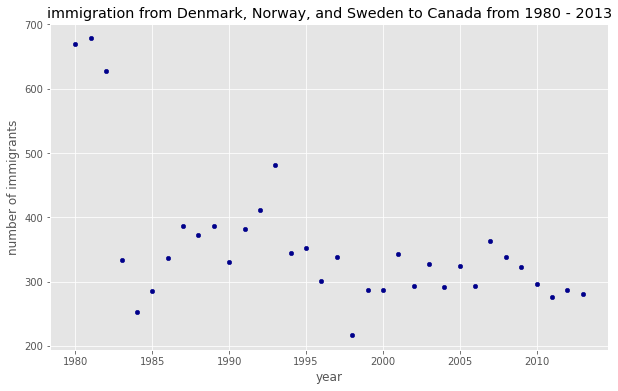

In [10]:
### type your answer here
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('year')
plt.ylabel('number of immigrants')

plt.show()

**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

In [11]:
df_can_t = df_can[years].transpose() 

df_can_t.index = map(int, df_can_t.index)

df_can_t.index.name = 'Year'

df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Step 1: Normalize the data pertaining to China and India.

In [12]:
### type your answer here
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


Step 2: Generate the bubble plots.

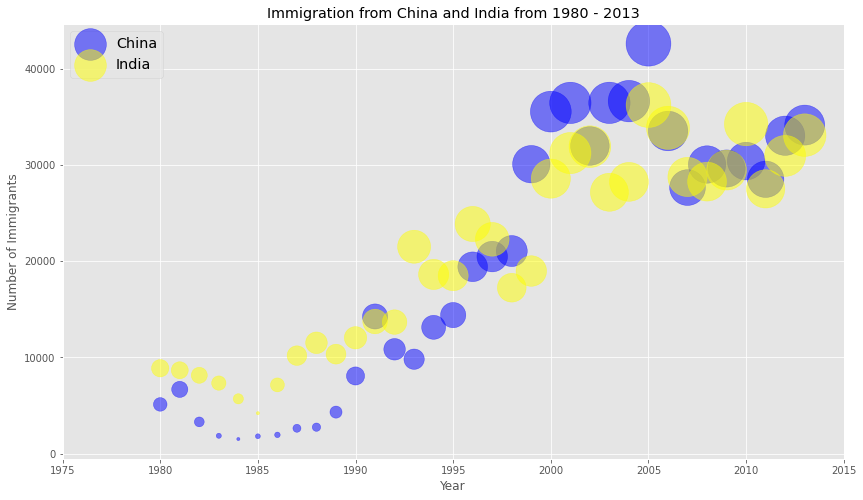

In [13]:
### type your answer here
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  
                    color='blue',
                    s=norm_china * 2000 + 10,  
                    xlim=(1975, 2015)
                   )
# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="yellow",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).